# OHM Bond Volatility Research

## Summary

The research created here aims to discern the drivers of system volatility as it relates to bond release. Different parameterizations of bond release and the overall system are studied to determine the main effects.

## Experimental Set Up/Parameters

For each of the experiments below, there is a separate experimental set up described.

## KPIs/Metrics

TODO: Add descriptions

# Experiment 1 - Release Date Distribution Effect

## Experimental Setup

- The simulations are generally run with the normal parameters
- The bond scheduling is the change applied in this experiment
- There are three sets of bond release schedules and two levels of total face value which are compared against one and other

## Parameter Sweep

- total_face_value: The total amount of face value attributed to the bond release
    - Values are 2e6 and 5e6
- bond_value_distribution: The distribution between the values for each bond distribution. The larger the number, the higher the share of the total face value that is released at that given date.
    - Values are [1, 1, 1], [2, 1, 1], [4, 1, 1]

In [1]:
from model.utility.default_parameters import default_params1 as params
from model.signals.bond_signals import total_value_bond_creation
from model.utility.default_initial_state import default_initial_state1 as initial_state
from model.utility.initial_state_functions import fill_in_initial_state
from model.run import load_config, run,new_run, post_processing

# Create the different bonds
bonds = []
bond_schedule_name = []

# Universal Bond Params
start_dates = [10,30,50]
bond_tenors = 30

# Run parameters
number_runs = 10
number_steps = 100

# Equal value release bond
bonds.append(total_value_bond_creation(start_dates= start_dates,
                                  simulation_timesteps=number_steps,
                                  bond_tenors=bond_tenors,
                                  total_face_value=2e6,
                                  bond_value_distribution=[1, 1, 1]))
bond_schedule_name.append("1/1/1 Med")

bonds.append(total_value_bond_creation(start_dates= start_dates,
                                  simulation_timesteps=number_steps,
                                  bond_tenors=bond_tenors,
                                  total_face_value=5e6,
                                  bond_value_distribution=[1, 1, 1]))
bond_schedule_name.append("1/1/1 Lrg")

# Front loaded
bonds.append(total_value_bond_creation(start_dates= start_dates,
                                  simulation_timesteps=number_steps,
                                  bond_tenors=bond_tenors,
                                  total_face_value=2e6,
                                  bond_value_distribution=[2, 1, 1]))
bond_schedule_name.append("2/1/1 Med")

bonds.append(total_value_bond_creation(start_dates= start_dates,
                                  simulation_timesteps=number_steps,
                                  bond_tenors=bond_tenors,
                                  total_face_value=5e6,
                                  bond_value_distribution=[2, 1, 1]))
bond_schedule_name.append("2/1/1 Lrg")

# Extreme front loaded
bonds.append(total_value_bond_creation(start_dates= start_dates,
                                  simulation_timesteps=number_steps,
                                  bond_tenors=bond_tenors,
                                  total_face_value=2e6,
                                  bond_value_distribution=[4, 1, 1]))
bond_schedule_name.append("4/1/1 Med")

bonds.append(total_value_bond_creation(start_dates= start_dates,
                                  simulation_timesteps=number_steps,
                                  bond_tenors=bond_tenors,
                                  total_face_value=5e6,
                                  bond_value_distribution=[4, 1, 1]))
bond_schedule_name.append("4/1/1 Lrg")



params.update({'bond_create_schedule':bonds})
params.update({'bond_schedule_name':bond_schedule_name})

# Fill in the initial state
initial_state = fill_in_initial_state(initial_state, params)



# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = new_run(exp)

# Parse the raw data
df1 = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 22, 60, 69)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 22, 60, 69)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 416.08s


In [2]:
df1.to_csv("bond_research_runs1.csv")


In [1]:
import pandas as pd
df1 = pd.read_csv("bond_research_runs1.csv", index_col=0)
number_steps = 100

### General Visualizations

The following are two visualizations for the rate at which experiments were interrupted as well as the averages of standard deviations between runs.

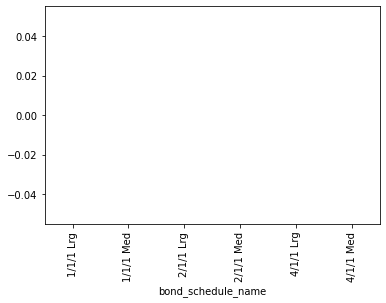

In [2]:
from model.utility.visualization import plot_simu_interruption_rate

plot_simu_interruption_rate(df1,
                            number_steps,
                           ["bond_schedule_name"])


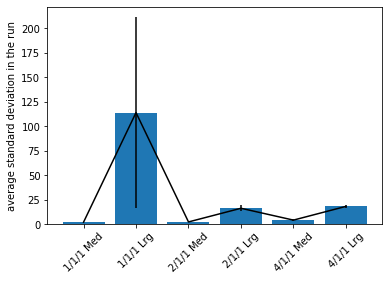

In [3]:
from model.utility.visualization import plot_price_standard_deviation

plot_price_standard_deviation(df1)          


# Experiment 2: different distribution of bond amount regarding different tenors

In [19]:
from model.utility.default_parameters import default_params1 as params
from model.signals.bond_signals import total_value_bond_creation
number_runs = 10
number_steps = 100

total_amount = 3e6
val_ratio1=[2,1,1]
bond0 = total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=total_amount,bond_value_distribution=[])
bond1 = total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=total_amount,bond_value_distribution=val_ratio1)
val_ratio2 = [3,1,1]
bond2 = total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=total_amount,bond_value_distribution=val_ratio2)

params.update({'bond_create_schedule':[bond0,bond1,bond2]})
params.update({'bond_schedule_name':['equal value','value ratio for diff tenors:'+str(val_ratio1),'value ratio for diff tenors:'+str(val_ratio2)]})
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)

from model.run import load_config, run,new_run, post_processing
# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = new_run(exp)

# Parse the raw data
df2 = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 22, 30, 69)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 22, 30, 69)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 138.26s


In [16]:
import pickle
pickle.dump([df1,df2],open('simudata/ohmbond_research/simu_df12.p','wb'))

In [4]:
import pickle

[df1,df2] = pickle.load(open('simudata/ohmbond_research/simu_df12.p','rb'))
number_steps = 100

subset
0    0.0
1    0.0
2    0.0
Name: timestep, dtype: float64


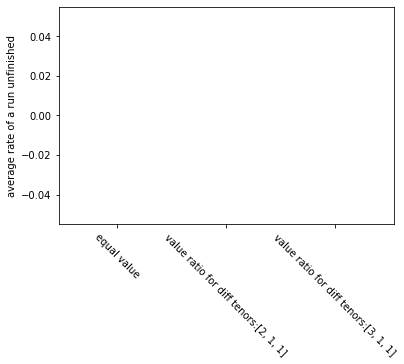

In [21]:
from model.utility.visualization import plot_simu_interruption_rate
plot_simu_interruption_rate(df2,number_steps)


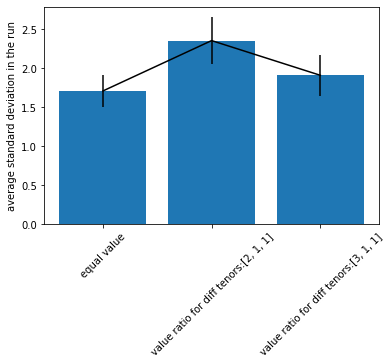

In [27]:
plot_price_standard_deviation(df2)          


From the current simulation, either the unequal distribution for bonds of different starting dates or different tenors won't cause any statistically significant.

What would be a significant factor that affects volatility?
- the impact factor from bond to netflow
- overall market activity volatility (the randomization of netflow)
- with or without RBS

# Experiment 3: volatility with or without RBS

In [28]:
from model.utility.default_parameters import default_params1 as params
from model.signals.bond_signals import total_value_bond_creation
number_runs = 10
number_steps = 100
val_ratio1=[2,1,1]

total_amount = 3e6
bond0 = total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=total_amount,bond_value_distribution=[])
bond1 = total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=total_amount,bond_value_distribution=val_ratio1)
val_ratio2 = [3,1,1]
bond2 = total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=total_amount,bond_value_distribution=val_ratio2)

params.update({'bond_create_schedule':[bond0,bond1,bond2]})
params.update({'bond_schedule_name':['equal value','value ratio for diff tenors:'+str(val_ratio1),'value ratio for diff tenors:'+str(val_ratio2)]})
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)

from model.run import load_config, run, post_processing
# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps,psub_scenario_option='NoRBS')

# Run the experiment
raw = run(exp)

# Parse the raw data
df3 = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 22, 30, 69)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 22, 30, 69)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 82.19s


subset
0    0.0
1    0.0
2    0.0
Name: timestep, dtype: float64


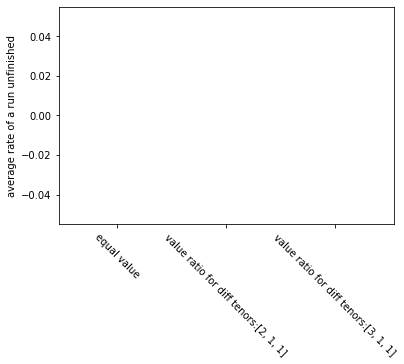

In [29]:
from model.utility.visualization import plot_simu_interruption_rate
plot_simu_interruption_rate(df3,number_steps)

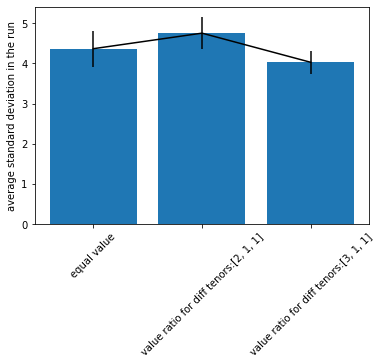

In [29]:
from model.utility.visualization import plot_price_standard_deviation

plot_price_standard_deviation(df3)          


In [3]:
# import pickle
# [df1,df2,df3] = pickle.load(open('simudata/ohmbond_research/simu_df.p','rb'))

/home/zhiwei/Documents/blockscience/OlympusRBS/model/utility/visualization.py:66: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


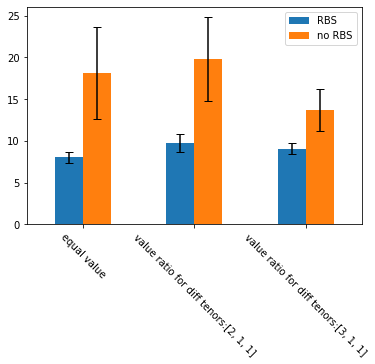

In [4]:
from model.utility.visualization import plot_price_standard_deviation_multiple_exps
exps = [{'label':'RBS','df':df2},{'label':'no RBS','df':df3}]
plot_price_standard_deviation_multiple_exps(exps)

with RBS, the volatility increases significantly. The bond distribution still doesn't have a significant effect on volatility though.

In [32]:
# import pickle
# pickle.dump([df1,df2,df3],open('simudata/ohmbond_research/simu_df.p','wb'))

# Experiment 4: bond amount and possibility of draining the pool

In [24]:
from model.utility.default_parameters import default_params1 as params
from model.signals.bond_signals import total_value_bond_creation
number_runs = 10
number_steps = 100

total_amounts = [4e6,4.5e6,5e6]
allbonds = []
for amount in total_amounts:
    allbonds.append(total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=amount,bond_value_distribution=[]))

params.update({'bond_create_schedule':allbonds})
params.update({'bond_schedule_name':[f'total amount {k:.1e}' for k in total_amounts]})
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)

from model.run import load_config, run,new_run, post_processing
# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps)

# Run the experiment
raw = new_run(exp)

# Parse the raw data
df4 = post_processing(raw)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 22, 30, 69)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 22, 30, 69)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 78.32s


subset
0    0.0
1    0.5
2    1.0
Name: timestep, dtype: float64


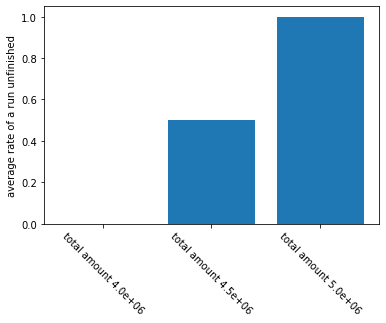

In [5]:
from model.utility.visualization import plot_simu_interruption_rate
plot_simu_interruption_rate(df4,number_steps=100)

In [26]:
import pickle
pickle.dump(df4,open('simudata/ohmbond_research/simu_df4.p','wb'))

# Experiment 5: does RBS help to prevent pool drainage?

In [5]:
from model.utility.default_parameters import default_params1 as params
from model.signals.bond_signals import total_value_bond_creation
number_runs = 10
number_steps = 100

total_amounts = [4e6,4.5e6,5e6]
allbonds = []
for amount in total_amounts:
    allbonds.append(total_value_bond_creation(start_dates= 5, simulation_timesteps=number_steps, bond_tenors=[30,60,90], total_face_value=amount,bond_value_distribution=[]))

params.update({'bond_create_schedule':allbonds})
params.update({'bond_schedule_name':[f'total amount {k:.1e}' for k in total_amounts]})
from model.utility.default_initial_state import default_initial_state1 as initial_state
# Fill in the initial state
from model.utility.initial_state_functions import fill_in_initial_state
initial_state = fill_in_initial_state(initial_state, params)

from model.run import load_config, run,new_run, post_processing
# Load the experiment
exp = load_config(number_runs, params, initial_state, number_steps,psub_scenario_option='NoRBS')

# Run the experiment
raw = new_run(exp)

# Parse the raw data
df5 = post_processing(raw)
pickle.dump(df5,open('simudata/ohmbond_research/simu_df5.p','wb'))


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

cadCAD Version: 0.4.28
Execution Mode: local_proc
Simulation Dimensions:
Entire Simulation: (Models, Unique Timesteps, Params, Total Runs, Sub-States) = (1, 100, 22, 30, 69)
     Simulation 0: (Timesteps, Params, Runs, Sub-States) = (100, 22, 30, 69)
Execution Method: local_simulations
Execution Mode: parallelized
Total execution time: 37.96s


In [1]:
import pickle
df5 = pickle.load(open('simudata/ohmbond_research/simu_df5.p','rb'))
df4 = pickle.load(open('simudata/ohmbond_research/simu_df4.p','rb'))

/home/zhiwei/Documents/blockscience/OlympusRBS/model/utility/visualization.py:89: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


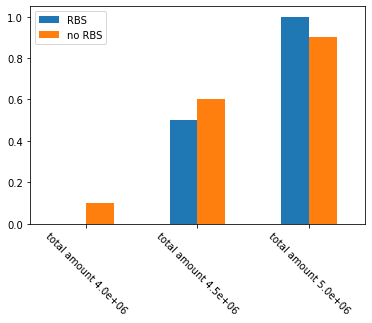

In [2]:
from model.utility.visualization import plot_simu_interruption_rate_multiple_exps
exps = [{'label':'RBS','df':df4},{'label':'no RBS','df':df5}]
plot_simu_interruption_rate_multiple_exps(exps,number_steps=100)

RBS doesn't necessarily reduce the chance of pool being drained.